<a href="https://colab.research.google.com/github/conichito/F3104/blob/main/Tarea%203/tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importamos librerias

import numpy as np
import matplotlib.pyplot as plt

#P1

**Paso 1:** Definimos los términos del método RK2 (esquema del punto medio):

$$
\begin{aligned}
k_1 &= h\lambda y_n \\
k_2 &= h\lambda \left(y_n + \frac{1}{2}k_1\right) = h\lambda \left(1 + \frac{h\lambda}{2}\right)y_n
\end{aligned}
$$

**Paso 2:** Actualización de la solución:

$$
y_{n+1} = y_n + k_2 = \left(1 + h\lambda + \frac{(h\lambda)^2}{2}\right)*y_n*
$$

**Paso 3:** Análisis del error $\xi_n = y_n - y(t_n)$:

$$
\xi_{n+1} = \left(1 + h\lambda + \frac{(h\lambda)^2}{2}\right)\xi_n
$$

**Paso 4:** Condición de estabilidad (error no creciente):

$$
\left|1 + h\lambda + \frac{(h\lambda)^2}{2}\right| \leq 1
$$

**Resolución:**  
Para $\lambda < 0$ (caso estable), resolvemos:

1. $1 + h\lambda + \frac{(h\lambda)^2}{2} \leq 1$  
   $\Rightarrow h\lambda\left(1 + \frac{h\lambda}{2}\right) \leq 0$  
   $\Rightarrow -2 \leq h\lambda \leq 0$

2. $1 + h\lambda + \frac{(h\lambda)^2}{2} \geq -1$  
   Se cumple automáticamente en este intervalo.

**Conclusión:**  
El método RK2 es estable cuando $-2 \leq h\lambda \leq 0$.

#P2

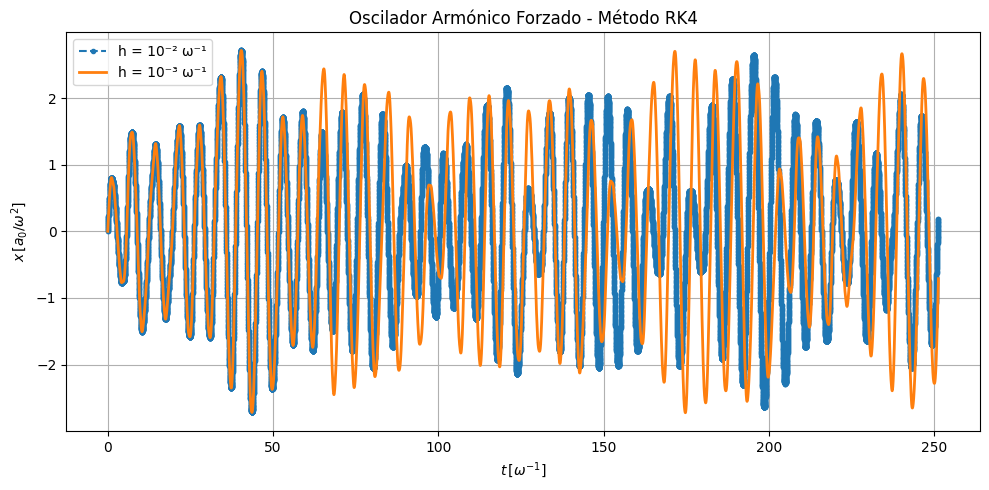

In [12]:
# Definimos parámetros del problema
omega = 1.0          # arbitrario
a0 = 1.0             # arbitrario
Omega = 2 * np.pi * omega
k = 2 * np.pi / (a0 / omega**2)

# Condiciones iniciales
x0 = 0
v0 = a0 / omega

# Tiempo de simulación
P = 2 * np.pi / omega
t_max = 40 * P

# Pasos temporales
h1 = 1e-2 / omega
h2 = 1e-3 / omega

# Sistema de ecuaciones para RK4
def f(t, y):
    x, v = y
    dxdt = v
    dvdt = -omega**2 * x + a0 * np.sin(k * x - Omega * t)
    return np.array([dxdt, dvdt])

# Método RK4
def rk4(f, y0, t0, tf, h):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    while t < tf:
        if t + h > tf:
            h = tf - t
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        y = y + (k1 + 2*k2 + 2*k3 + k4)/6
        t += h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

# Simulaciones
t1, y1 = rk4(f, np.array([x0, v0]), 0, t_max, h1)
t2, y2 = rk4(f, np.array([x0, v0]), 0, t_max, h2)

# Normalizamos
t1_norm = omega * t1
x1_norm = omega**2 * y1[:, 0] / a0
t2_norm = omega * t2
x2_norm = omega**2 * y2[:, 0] / a0

# Gráficamos
plt.figure(figsize=(10, 5))
plt.plot(t1_norm, x1_norm, label=f'h = 10⁻² ω⁻¹', linestyle='--', marker='o', markersize=3)
plt.plot(t2_norm, x2_norm, label=f'h = 10⁻³ ω⁻¹', linestyle='-', linewidth=2)
plt.xlabel(r'$t \, [\omega^{-1}]$')
plt.ylabel(r'$x \, [a_0 / \omega^2]$')
plt.title('Oscilador Armónico Forzado - Método RK4')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#P3

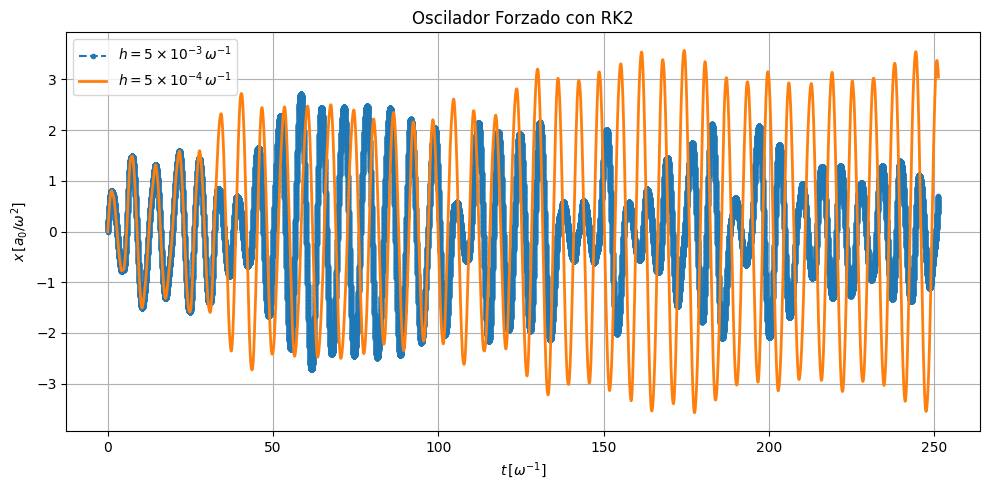

In [13]:
# Pasos temporales para RK2
h1 = 5e-3 / omega
h2 = 5e-4 / omega

# Método RK2 (punto medio)
def rk2(f, y0, t0, tf, h):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    while t < tf:
        if t + h > tf:
            h = tf - t
        k1 = f(t, y)
        k2 = f(t + h/2, y + h/2 * k1)
        y = y + h * k2
        t += h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

# Correr simulaciones
t1, y1 = rk2(f, np.array([x0, v0]), 0, t_max, h1)
t2, y2 = rk2(f, np.array([x0, v0]), 0, t_max, h2)

# Normalización
t1_norm = omega * t1
x1_norm = omega**2 * y1[:, 0] / a0
t2_norm = omega * t2
x2_norm = omega**2 * y2[:, 0] / a0

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(t1_norm, x1_norm, label=r'$h = 5 \times 10^{-3} \, \omega^{-1}$', linestyle='--', marker='o', markersize=3)
plt.plot(t2_norm, x2_norm, label=r'$h = 5 \times 10^{-4} \, \omega^{-1}$', linewidth=2)
plt.xlabel(r'$t \, [\omega^{-1}]$')
plt.ylabel(r'$x \, [a_0 / \omega^2]$')
plt.title('Oscilador Forzado con RK2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
